# Primeira Lei da Termodinâmica

## Fundamentos teóricos

<font size="4"> Imagine um sistema fechado, por exemplo o refrigerante dentro de uma garrafa ou um cilindro de gás. Este sistema quando em repouso e na ausência de campos externos, apresenta  uma determinada energia, denominada energia interna (U). Esta energia está relacionada a energia cinética e potencial das partículas que compõe o sistema. Se desejamos causar alguma alteração no sistema, as únicas maneiras de se fazer isso é esquentando ou resfriando o sistema, ou realizando trabalho.
    
O primeiro método é intuitivo e pode ser feito por fazer o sistema entrar em contato com um corpo em temperatura mais alta ou mais baixa. Quando isso acontecer, haverá fluxo de calor (Q) do corpo mais quente para o corpo mais frio. Quando o sistema esfriar, significa que este perdeu calor para as vizinhanças, logo sofreu um processo exotérmico (Q < 0). No entanto, quando o sistema esquentar, este recebeu calor das vizinhanças, logo, passou por um processo endotérmico (Q > 0). 
    
No caso do sistema fechado, realizar trabalho significa a princípio  provocar uma mudança de volume do sistema contra uma pressão externa. Este trabalho é visto como uma elevação ou abaixamento de uma massa nas vizinhanças. Se houver uma expansão do sistema, elevando uma massa nas vizinhanças, é dito que foi realizado trabalho nas vizinhanças e este é positivo (W  > 0). Caso haja uma contração do sistema, é dito que foi realizado trabalho sobre o sistema e este é negativo (W < 0).  Matematicamente o trabalho de expansão pode ser definido como: 

$dW = -p_{ex}dV$

Desta maneira podemos escrever que energia interna de um sistema fechado obedeça a relação:

$U = Q + W$

ou na forma diferencial 

$dU = dQ + dW$

Trabalho e calor são propriedades intrínsecas da transformação que o sistema sofreu, logo, dependem do caminho da transformação. Enquanto que U depende apenas do estado final e inicial do sistema, por isso é chamado de função de estado termodinâmico. Por consequência, em um sistema isolado que passa por uma transformação cíclica

$dU = 0$ 
<font>

Os seguintes módulos precisam ser carregados para resolução dos exercícios:

In [2]:
#bibliotecas necessárias para resolução de exercícios
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad # rotina para integraçã ode funções pelo método da quadratura
import matplotlib.pyplot as plt

## Exemplo 1: Cálculo do trabalho em uma expansão reversível de um gás ideal

<font size="4"> Considere a compressão reverssível de 1.0 mol de um gás ideal, de 22.4 L para 10.0L mantendo T constante a 0ºC. Calcule o trabalho realizado neste processo. Repita os cáclulos para uma segunda compressão de 10.0 L até 1.0 L mantendo a temperatura a 0ºC.

### Solução 

O trabalho reversível é o trabalho teórico máximo que o sistema pode realizar. Este trabalho é teórico pois considera que o trabalho é feito em *n* etapas infinitesimais. O valor do trabalho dependerá do sistema e da equação de estado que descreve este sistema. Por este motivo, em primeiro lugar é preciso encontrar um expressão para o trabalho p-V de um gás ideal. No trabalho reversível podemos considerar que a pressão de oposição se iguala a pressão do sistema, sendo esta calculada pela equação de estado. Desta forma podemos obter o trabalho reversível de uma gás ideal da seguinte forma:

$$ dW = -pdV $$
$$ p = nRT/V $$
$$ \int dW = -nRT \int _{V_1} ^{V_2} \frac{dV}{V} $$
    
$$ W = -nRT ln(V_2/V_1) $$ 
       

<font size="4"> O problema é dividido em duas etapas. Logo, será calculado o trabalho para primeira compressão, seguido do cálculo do trabalho para segunda compressão. O trabalho total é a soma do trabalho realizado em cada etapa individual. <font>

In [3]:
#Primeira compressão
#Definição das variáveis

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4          # L
V2 = 10.0            

# Cálculo

W1 = -n*R*T*np.log(V2/V1)

print('W (J/mol)= ' + format(W1 , '6.3f'))

W (J/mol)= 1831.482


In [4]:
# Segunda Compressão

V3 = 1.0       # L

# Cálculo

W2 = -n*R*T*np.log(V3/V2)

print('W (J/mol)= ' + format(W2 , '6.3f'))

W (J/mol)= 5229.100


<font size="4"> O trabalho total é a soma dos trabalhos realizados em cada etapa. Neste ponto é ilustrativo comparar o trabalho total realizado em duas etapas, com o trabalho realizado em uma única etapa de 22.4 L até 1 L. <font >

In [5]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J/mol)= ' + format(Wtotal , '6.3f'))

# Trabalho total em uma etapa

W = -n*R*T*np.log(V3/V1)

print('W em uma única etapa (J/mol)= ' + format(W , '6.3f'))

W em duas etapas(J/mol)= 7060.581
W em uma única etapa (J/mol)= 7060.581


<font size="4"> Apesar dos resultados serem iguais, o trabalho **não é** uma função de estado termodinâmico, logo, seu valor não depende apenas do estado final e inicial. A princípio os resultados poderiam ser diferentes. <font>

## Exemplo 2: Cálculo do trabalho em uma expansão reversível de um gás de van der Waals

<font size="4"> Repita o exercício anterior para o $O_2$, assumindo que este se comporta como um gás de van der Waals. 

### Solução

Novamente nosso problema se resume a encontrar uma equação com a qual podemos calcular o trabalho feito por um gás de van der Waals.
    
$$ dW = -pdV $$

A equação de estado para um gás de van der Waals é:

$$ p = \frac{RT}{V_m-b} - \frac{a}{V^2_m} $$

Substituindo esta equação na definição do trabalho p-V, encontraremos a expressão desejada.

$$ \int dW = - \int _{V_1} ^{V_2} \left (\frac{RT}{V_m-b} - \frac{a}{V^2_m} \right)dV $$
    
$$ W = -RT ln \left( \frac{V_{m,2} -b}{V_{m,1} -b} \right) -a \left( \frac{1}{V_{m,2}} - \frac{1}{V_{m,1}} \right) $$     


<font size="4"> Assim como no problema anterior será calculado o trabalho para primeira compressão, seguido do cálculo do trabalho para segunda compressão. O trabalho total é a soma do trabalho realizado em cada etapa individual. <font>

In [6]:
#Primeira compressão
#Definiçãodas variáveis

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4e-3       # m^3
V2 = 10.0e-3            
a = 0.1380         # m^3 Pa / mol^2
b = 0.0319e-3      # m^3 / mol 

#Cálculo

W1 = -R*T*np.log((V2-b)/(V1-b)) -a*(1/V2 - 1/V1)

print('W (J/mol)= ' + format(W1 , '6.3f'))

W (J/mol)= 1827.862


In [7]:
# Segunda Compressão

V3 = 1.0e-3    # m^3

W2 = -R*T*np.log((V3-b)/(V2-b)) -a*(1/V3 - 1/V2)

print('W (J/mol)= ' + format(W2 , '6.3f'))

W (J/mol)= 5171.268


<font size="4"> Pode-se verificar que o uso da equação de van der Waals leva a resultados distintos aos obtidos com a equação do gás ideal. Para fins didáticos, a comparação anterior do trabalho realizado em  em dois estágios com o trabalho em um estágio será refeita. <font >

In [8]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J/mol)= ' + format(Wtotal , '6.3f'))

# Trabalho total em uma etapa

W = -R*T*np.log((V3-b)/(V1-b)) -a*(1/V3 - 1/V1)

print('W em uma única etapa (J/mol)= ' + format(W , '6.3f'))

W em duas etapas(J/mol)= 6999.130
W em uma única etapa (J/mol)= 6999.130


## Exemplo 3: Cálculo do trabalho em uma expansão reversível de um gás que obedece uma expansão do virial


<font size = "4"> A equação de estado dos gases pode ser escrita na forma de uma expansão do virial, $ pV_m = RT \left( 1 + \frac{B}{V_{m,}} + \frac{C}{V^2_{m}} + ...\right)$. Repita os exercícios anteriores para compressão do $O_2$ e compare os resultados. Dados: B = $ -22,0 \times 10^{-6} m^3 mol^{-1}$, C = $ 1100 \times 10^{-12} m^6 mol^{-2}$.

### Solução 

Em primeiro lugar é preciso encontrar um expressão para o trabalho p-V de um gás que obedece a equação do virial. 
    
$$ dW = -pdV $$
    
$$ p = \frac{nRT}{V} \left( 1 + \frac{B}{V_{m,}} + \frac{C}{V^2_{m}} + ...\right) $$
    
$$ \int dW  = - \frac{nRT}{V} \int _{V_1} ^{V_2} \left( 1 + \frac{B}{V_{m,}} + \frac{C}{V^2_{m}} + ...\right) dV $$
    
$$ W  = - nRT \left( ln(V_2/V_1) - B \left( \frac{1}{V_2} - \frac{1}{V_1} \right ) - \frac{C}{2} \left( \frac{1}{V^2 _2} - \frac{1}{V^2 _1} \right )\right) $$  

<font size="4"> Note que o procedimento é o mesmo em todos os casos: Substituir o valor da pressão na equação do trabalho utilizando a equação de estado desejada. Posteriormente resolução da equação diferenção pela integração em ambos os lados. De posse da expressão analítca calcular o trabalho realizado. <font>

In [9]:
#Primeira compressão
#Definição das variáveis

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4e-3        # m^3
V2 = 10.0e-3            
B = -22.0e-6        # m**3 / mol 
C = 1100e-12        # m**6 / mol**2

#Cálculo

W1 = -R*T*(np.log(V2/V1) - B*(1/V2 - 1/V1)-C/2 * (1/V2**2 - 1/V1**2))

print('W (J/mol)= ' + format(W1 , '6.3f'))

W (J/mol)= 1828.726


In [10]:
# Segunda Compressão

V3 = 1.0e-3    # m^3

W2 = -R*T*(np.log(V3/V2) - B*(1/V3 - 1/V2)-C/2 * (1/V3**2 - 1/V2**2))

print('W (J/mol)= ' + format(W2 , '6.3f'))

W (J/mol)= 5185.371


In [11]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J/mol)= ' + format(Wtotal , '6.3f'))

W em duas etapas(J/mol)= 7014.097


## Exemplo 4: Cálculo do trabalho em uma expansão reversível de um gás de Redlich-Kwong 


<font size ="4" >O estado de um gás pode ser descrito pela equação de Redlich-Kwong, $ \left (p +\frac{a}{V_m(V_m +b)T^{1/2}} \right) (V_m - b) = RT $. Repita os exercícios anteriores para compressão do $O_2$ e compare os resultados. Dados: a = 17,16 $L^2 K^{1/2} atm. mol^{-2}$, b = $0,0221 L. mol^{-1}$.

### Solução

Novamente nosso problema se resume a encontrar uma equação com a qual podemos calcular o trabalho feito por um gás que obedece a equação de Redlich-Kwong.
    
    
$$ dW = -pdV $$
    
$$ p = \frac{RT}{V_m-b} - \frac{a}{V_m(V_m +b)T^{1/2}} $$
    
$$ \int dW = - \int _{V_1} ^{V_2} \left ( \frac{RT}{V_m-b} - \frac{a}{V_m(V_m +b)T^{1/2}} \right) dV $$


A segunda integral da direita pode ser resolvida pelo método das frações parciais, ou usar diretamente o resultado:
    
$ \int \frac{1}{x(x+b)} dx = \frac{1}{b} ln \left( \frac{x}{x+b} \right) $  

$$ W = -RT ln \left( \frac{V_{m,2} -b}{V_{m,1} -b} \right) -\frac{a}{bT^{1/2}} ln \left( \frac{V_2(V_1+b)}{V_1(V_2+b)} \right) $$ 
    

In [12]:
#Primeira compressão
#Definição das variáveis

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4e-3       # m^3
V2 = 10.0e-3            
a = 17.16*101.3e-3        # m**6 K^0,5 Pa / mol^2 
b = 0.0221e-3             # m**3 / mol

#Cálculo

W1 = -R*T*np.log((V2-b)/(V1-b)) + a/(b*T**0.5) *(np.log(V2/V1) - np.log((V2-b)/(V1-b)))

print('W (J/mol)= ' + format(W1 , '6.3f'))

W (J/mol)= 1840.096


In [13]:
#Cálculo da segunda compressão

V3 = 1.0e-3    # m^3

W2 = -R*T*np.log((V3-b)/(V2-b)) + a/(b*T**0.5) *(np.log(V3/V2) - np.log((V3-b)/(V2-b)))

print('W (J/mol)= ' + format(W2 , '6.3f'))

W (J/mol)= 5370.655


In [14]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J/mol)= ' + format(Wtotal , '6.3f'))

W em duas etapas(J/mol)= 7210.751


<font size ="4"> A comparação do valor calculado para o trabalho considerando quatro equações de estado distintas mostra que o resultado final depende da equação de estado escolhida. Equações de estado mais complexas que as usadas nestes exercícios são conhecidas e a escolha da equação a ser utilizada  dependerá das condições do problema, tipo de transformação que está sendo estudada e a precisão desejada. <font>

## Exemplo 5: Cálculo do trabalho associado a uma reação química  


<font size = "4"> Uma reação química ocorre num vaso de seção reta uniforme de 50 cm², provido de um pistão. Em virtude de reação, o pistão se desloca 15 cm contra a pressão externa de 1 atm. Calcule o trabalho feito pelo sistema.

### Solução 

O trabalho é $ W = -\int p_{ext} dV = - p_{ext} \Delta V $, onde a variação do volume é dado pela distância de deslocamento do pistão multiplicado pela área seção reta do mesmo. Perceba que neste caso é usado a pressão externa e não a equaçã ode estado de um gás. É feito desta maneira porque o problema informa que a expansão ocorre contra uma pressão de oposição constante.<font>

In [15]:
# Definindo variáveis

A= 0.0050     #m² (Valor já convertido de cm² para m²) 
x = 0.15      #m (Valor já convertido de cm para m)
P = 101325    #Pa (Valor convertido de 1 atm para Pascal)

#Cálculos (Como o pistão se desloca contra a pressão externa, o valor do trabalho será negativo)

Volume = A*x

W= - P*Volume

print("Trabalho (J)=" + format(W,'6.3f'))

Trabalho (J)=-75.994


<font size ="4"> O trabalho negativo indica que o sistema realizou trabalho sobre as vizinhanças associado a sua expansão. <font>

## Exercício 6: Cálculos envolvendo aquecimento de um gás ideal


<font size = "4">Uma amostra de 1,00 mol de um gás ideal monoatômico, Cv = 3/2R, inicialmente a $p_1$ = 1,00 atm e $T_1$ = 300 K, é aquecida reversivelmente, até 400 K, a volume constante. Calcule a pressão final, ΔU, Q e W.

### Solução

Para este caso, W = 0, pois V = cte, e dU = dQ. Sabemos que:
    
$$ \Delta U = \int_{T_1}^{T_2} C_V dT $$     
    
Por consequência:

$$ Q = \int_{T_1}^{T_2} C_V dT $$ 

Como Cv é constante, o problema se torna:
    
$$ Q = C_V \Delta T $$

In [16]:
#Definindo variáveis

p = 1   #atm

T1 = 300    #K
T2 = 400    #K
R=8.3145    #J K-¹ mol-¹
Cv= 3/2*R
n = 1       #mol

# Primeiro passo - Integração: dU = ∫ Cv*dT

ΔU = Cv*(T2-T1)       #Após a integração.

print('ΔU (J/mol) = ' + format(ΔU,'6.2f'))

Q = ΔU

print('Q (J/mol) = ' + format(Q,'6.2f'))

ΔU (J/mol) = 1247.17
Q (J/mol) = 1247.17


## Exemplo 7: Cálculos da primeira Lei envolvendo o aquecimento de um gás ideal


<font size = "4">Quando se aquecem 2 mols de $CO_2$, à pressão constante de 1,25 atm, sua temperatura passa de 250 K a 277 K. A capacidade calorífica molar do $CO_2$ a pressão constante, $C_{p,m}$, é 37,11 JK-¹ mol-¹. Calcule Q, ΔH e ΔU.

### Solução 

Sabe-se que nessas condições de pressão constante Q = $ \Delta H $. Portanto, temos realizar apenas uma integração:

$$ \Delta H = Q= \int_{250}^{277} C_p dT$$ 


Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação

$$ \Delta U =  \int_{250}^{277} (C_p - 2R) dT     $$  

Como foi informado $C_{p,m}$, e o problema se refere a 2 mols de $CO_2$, o valor de $C_{p}$ a ser utilizado no problema é 74,22 JK-¹ mol-¹. <font>
    

In [17]:
#Definindo variáveis

p = 1.25    #atm
T1 = 250    #K
T2 = 270    #K
cp = 74.22  #J K-¹ mol-¹ 
n = 2       #mol
R = 8.314   # J K-¹ mol-¹


#Cálculo da entalpia
ΔH = n * cp * (T2-T1)

print("ΔH (J) = " + format(ΔH,'6.2f'))

#Cálculo da quantidade de calor
Q = ΔH 

print("Q (J) = " + format(Q,'6.2f'))

# Como temos somente o Cp, podemos achar o cv através da relação: nR = Cp - Cv

Cv = cp - n*R

#Cálculo da energia interna
ΔU = n * Cv * (T2 - T1)

print("ΔU (J) = " + format(ΔU,'6.4f'))


ΔH (J) = 2968.80
Q (J) = 2968.80
ΔU (J) = 2303.6800


## Exemplo 8: Cálculo da entalpia quando $C_p$ é função da temperatura


<font size ="4">Qual a variação da entalpia molar do $N_2$ quando este gás é aquecido de 25°C até 100°C? Considere $C_{p,m} (J K^{-1} mol^{-1}) = 28,58 + 3,77 \times 10^{-3} T - \frac{0,50 \times 10^5}{T^2}$.

### Solução

Este problema é solucionado resolvendo a seguinte equação:

$$\Delta Hº_m = \int_{T_1 }^{T_2 } C_{p,m}dT $$

$$\Delta Hº_m = \int_{T_1 }^{T_2 } (28,58 + 3,77 \times 10^{-3} T - \frac{0,50 \times 10^5}{T^2} )dT $$ 
    
$$\Delta Hº_m = (28,58(T_2 - T_1 )+ \frac{3,77 \times 10^{-3}}{2} (T_2 ^2 - T_1 ^2 )+ 0,50 \times 10^5 \times \left( \frac{1}{T_2} -\frac{1}{T_1} \right)dT $$ 
    

In [18]:
#Definindo variáveis 

T1 = 298        #K
T2 = 373        #K
a = 28.58   
b = 3.771e-3    #K-1
c= -0.50e5      #K²

# a, b e c são valores tabelados e que variam de acordo com cada composto estudado

# Escrevendo o resultado analítico da integral:


DeltaH = (a*(T2-T1)) + (1/2*b*(T2**2-T1**2)) - c*((1/T2)-(1/T1))

print(" Diferença de entalpia (J K-¹ mol-¹) =" + format(DeltaH,'6.4e'))

 Diferença de entalpia (J K-¹ mol-¹) =2.2047e+03


## Exemplo 9: Cálculos envolvendo a capacidade calorífica, quando esta é uma função da temperatura


<font size = "4">A capacidade calorífica a pressão constante de uma amostra de gás ideal varia com a temperatura de acordo com a expressão $C_p (J ~K^{-1}) = 20,17 + 0,3655 (T/K)$. Calcule Q, W e ΔH, quando a temperatura é elevada de 25°C a 200°C (i) a pressão constante e (ii) a volume constante.

### Solução do problema a p = cte

Sabe-se que nessas condições de pressão constante Q = $ \Delta H $. Portanto, temos que realizar apenas uma integração:

$$ \Delta H = Q= \int_{T_1}^{T_2} C_p dT$$ 

$$ \Delta H = Q =  \int_{298 K}^{473 K} 20,17 + 0,3665(T/K)   dT  $$

O trabalho é calculado a partir da primeira Lei da Termodinâmica: $ \Delta U = Q + W $.
Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação, assumindo 1 mol de gás ideal:

$$ \Delta U =  \int_{298 K}^{473 K} (20,17 + 0,3665(T/K) -R)   dT  $$

### Solução do problema a V = cte

A volume constante W = 0, logo, o cálculo da entalpia se dará pela seguinte integração :

$$ \Delta H = \int_{T_1}^{T_2} C_p dT$$ 

$$ \Delta H =  \int_{298 K}^{473 K} 20,17 + 0,3665(T/K)   dT  $$

O calor será calculado a partir da primeira Lei da Termodinâmica: $ \Delta U = Q  $.
Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação, assumindo 1 mol de gás ideal:

$$ \Delta U =  \int_{298 K}^{473 K} (20,17 + 0,3665(T/K) -R)   dT  $$  
    



In [19]:
#Definindo variáveis

T2 = 473    #K  
T1 = 298    #K  
n = 1       #mol
R = 8.3145  #J-¹mol-¹

# (i) = Pressão Constante
# cálculo do calor
Q = (20.17 * (T2 - T1)) + ((0.5*0.3665)*(T2**2-T1**2))

print("a) Q (J) = " + format(Q,'6.2f'))

#Como temos a pressão constante, sabe-se que Q = ΔH. Portanto:

ΔH = Q
print ("a) ΔH (J)= " + format(ΔH,'6.2f'))


# Calculando trabalho: 

DeltaU = (20.17-R * (T2 - T1)) + (0.5*0.3665)*(T2**2-T1**2)

W = DeltaU - Q

print("a) W (J) = " + format(W,'6.2f'))


#(ii) Volume Constante

#cálculo da entalpia

ΔH = 20.17 * (T2 - T1) + (0.5*0.3665)*(T2**2-T1**2)

print("b) ΔH (J)= " + format(ΔH,'6.2f'))


# O trabalho depende da variação de volume, portanto:

W1 = 0

print ("b) W (J) = " + format(W1,'6.2f'))

#Calculando o calor.
#Primeiro é obtido a variação da energia interna

DeltaU = (20.17-R * (T2 - T1)) + (0.5*0.3665)*(T2**2-T1**2)

Q = DeltaU

print ("b) Q (J) = " + format(Q,'6.2f'))


a) Q (J) = 28254.76
a) ΔH (J)= 28254.76
a) W (J) = -4964.62
b) ΔH (J)= 28254.76
b) W (J) =   0.00
b) Q (J) = 23290.14


<font size ="4">  As propriedades termodinâmicas variam de acordo com o tipo de transformação que o sistema sofre. A entalpia só se igual a quantidade de calor quando a transformação é isobárica, em outras situação Q pode diferir do valor de $\Delta H$. Na ausência de trabalho diferente de expansão, só haverá trabalho se houver variação no volume do sistema. <font>

## Exemplo 10: Cálculo da entalpia em diferentes temperaturas

<font size ="4">A entalpia padrão de formação do $H_2 O(g)$ a 298K  é -241,82 kJ/mol. Estime seu valor a 100°C dadas as seguintes capacidades caloríficas molares, a pressão constante: $H_2 O(g):33,58 ~J K^{-1} mol^{-1}; H_2 (g): 28,84 ~J K^{-1} mol^{-1}; O_2(g): 29,37 ~J K^{-1} mol^{-1}$. Admita que as capacidades caloríficas sejam independentes da temperatura.

### Solução

É possível estimar a variação de entalpia em uma determinada temperatura a partir da entalpia e capacidades caloríficas em uma temperatura de referência. Nestes casos, é aplicada a Lei de Kirchhoff:

$$ \int d\Delta H = \int_{T_1}^{T_2} \Delta C_{p} dT$$

$$ \Delta H(T_2) -  \Delta H(T_1) = \int_{T_1}^{T_2} \Delta C_{p} dT$$

Onde $\Delta C_{p}$ é a diferença das capacidades caloríficas entre produtos e reagentes. A reação de formação da água é:
    
$$ H_2(g) + \frac{1}{2} O_2(g) \rightarrow H_2 O(g) $$ 
 
$$ \Delta C_{p} = C_{p}(H_2 O) - (C_p (H_2(g)) + \frac{1}{2} C_p (O_2(g)) $$ 
    <font>

In [20]:
#Definindo variáveis
T1 = 298          #K
T2 = 373          #K
cpH20 = 33.58     # J K-¹ mol-¹
cpH2 = 28.84      # J K-¹ mol-¹
cpO2 = 29.37      # J K-¹ mol-¹
HH20 = -241820    # J/mol

#Cálculos

#Reação:  H2(g) + 1/2* O2(g) ----> H2O (g)

DeltaCp = cpH20 - (cpH2 + (1/2*cpO2))

DeltaH2 = HH20 + DeltaCp*(T2-T1)

print("Entalpia-padrão de formação a 373K (J)=" + format(DeltaH2,'6.2f'))

Entalpia-padrão de formação a 373K (J)=-242565.88


## Exemplo 11: Obtenção do polinômio da capacidade calorífica por ajuste polinomial 


<font size ="4">Os dados a seguir mostram como a capacidade calorífica molar padrão, a pressão constante, do dióxido de enxofre varia com a temperatura. De quanto aumenta a entalpia molar padrão do $SO_{2(g)}$ quando a temperatura varia de 298,15 até 1500 K?

|   |   |   |   |    |   |    |    |
|----|----|----|----|----|----|----|----|
|T/K | 300 | 500 | 700 | 900 | 1100 | 1300 | 1500
|$C_{p,m} (J K^{-1} mol^{-1})$    | 39,909 | 	46,490 | 50,829| 53,407| 54,993 |56,033|56,759

### Solução

Em primeiro lugar é preciso encontrar uma equação que relacione Cp com temperatura, pois esta é função de T no intervalo de valores estudado. A princípio uma regressão polinomial será usada para encontrar a relação entre Cp e T. Em muito dos casos um polinômio de terceiro grau é suficiente para resolver este tipo de problema. <font>

In [21]:
# Escrevendo T e Cp como vetores

T = np.array([300,500,700,900,1100,1300,1500])
cp = np.array([39.909,46.490,50.829,53.407,54.993,56.033,56.759])


#Regressão de um polinômio de terceiro grau

deg = 3
z = np.polyfit(T, cp, deg)
y = np.poly1d(z)

#impressão dos resultados da regressão

print( 'Cp(T)= ' , y)


Cp(T)=             3             2
1.091e-08 x - 4.368e-05 x + 0.06222 x + 24.9


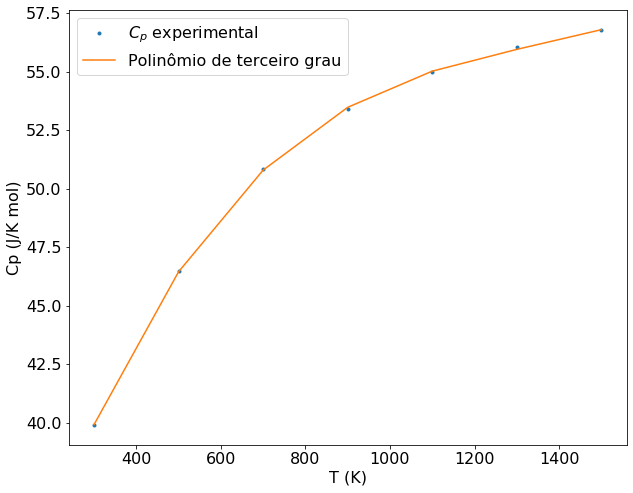

In [22]:
#Construção do gráfico para visualizar a qualidade do ajuste
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T, cp , ".", label = '$C_p$ experimental')
plt.plot(T, y(T), "-", label = 'Polinômio de terceiro grau')
plt.legend(loc='best')
plt.ylabel('Cp (J/K mol)')
plt.xlabel('T (K)')

plt.show()

<font size ="4"> O gráfico confirma que um polinônio de terceiro grau é suficiente para descrever a dependência de $C_p$ com a temperatura nas condições do problema.A partir do polinômio obtido é possível calcular a variação da entalpia pela integração da capacidade calorífica.
    
$$ \Delta H = \int_{T_1}^{T_2} C_p dT$$ 
    
$$ \Delta H = \int_{T_1}^{T_2} (aT^3 + bT^2 + cT + d) dT$$ 

O polinômio foi escrito na ordem em que os coeficientes são guardados no vetor z. A resolução da integral resulta em:
    
$$ \Delta H = (\frac{a}{4}(T_2^4 - T_1^4 )  + \frac{b}{3}(T_2^3 - T_1^3 ) + \frac{c}{2}(T_2^2 - T_1^2 ) + d(T_2 - T_1) $$ 
    
    
    
<font>

In [23]:
# Realizar a integração da função obtida no intervalo de temperaturas do problema.
# O resultado analítico da integração está escrito abaixo

T2 = 1500 #K
T1 = 298.15   #K


DeltaH = z[0]/4*(T2**4 - T1**4) + z[1]/3*(T2**3-T1**3) + z[2]/2*(T2**2-T1**2) + z[3]*(T2-T1)

print("DeltaH (J)=" + format(DeltaH,'6.2f'))

DeltaH (J)=62199.43


## Exemplo 12: Obtendo funções para Cp(T)


<font size ="4"> Os dados a seguir mostram como a capacidade calorífica molar padrão a pressão constante da amônia varia com a temperatura. Ajuste uma expressão com a forma $ C_{p,m} = a + bT + \frac{c}{T^2}$ aos dados, e determine os valores de a, b e c. Verifique se não seria melhor expressar os dados na forma $C_{p,m} = \alpha + \beta T + \gamma T^2$, e determine os valores desses coeficientes.

|   |   |   |   |    |   |    |    |    |
|---|---|---|---|---|---|---|---|---|
|T/K | 300 | 400 | 500 | 600 | 700 | 800 | 900 | 1000
|Cp,m (J K-¹mol-¹)    | 35,678 | 	38,674 | 41,994| 45,229|48,269 |51,112|	53,769| 56,244     <font>

<font size ="4">
    
    
### Solução

O ajuste da primeira função será feito usando a rotina scipy.optimize.curve_fit para fazermos uma regressão não linear usando o método dos mínimos quadrados. Inicialmente deve ser definido a função que desejamos ajustar aos dados fornecidos no problema, usando a sintaxe python padrão, e posteriormente proceder com o ajuste. Para comparamos a qualidade de ambos os ajustes, a equação de segundo grau sugerida será ajustada aos dados usando o mesmo procedimento. <font>

In [24]:
#Definindo T e Cp como vetores

T= np.array ([300,400,500,600,700,800,900,1000])
cp = np.array ([35.678,38.674,41.994,45.229,48.269,51.112,53.769,56.244])


# Definir a função que será ajustada usando o formato
# python para descrever funções

def func(T, a, b, c):

    return a + b*T + c/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão 
# de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.5e') + '/T²')   



Cºp,m =  2.880e+01 + 2.790e-02T -1.49041e+05/T²


In [25]:
# ajustando um polinômio de segunda grau

# Definir a função que será ajustada usando o formato
# python para descrever funções

def func2(T, a, b, c):

    return a + b*T + c*T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão 
# de cada parâmetro do ajuste
popt2, pcov2 = curve_fit(func2, T, cp)


print('Cºp,m = ' + format(popt2[0] , ' 6.3e') + ' +' + format(popt2[1] , ' 6.3e') + 'T ' + format(popt2[2] , ' 6.5e') + 'T²')   



Cºp,m =  2.464e+01 + 3.818e-02T -6.49464e-06T²


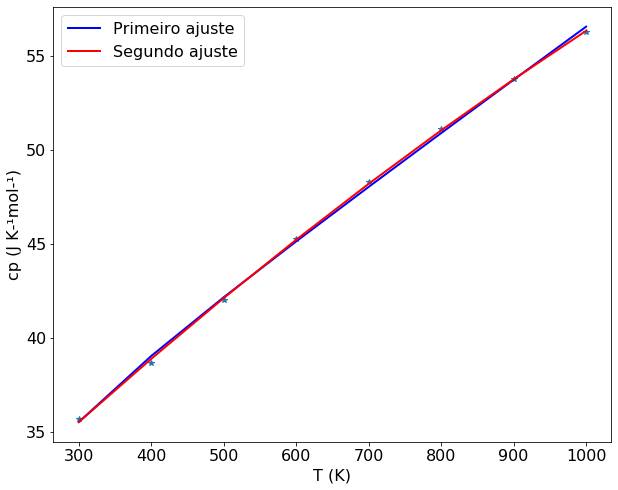

In [26]:
# Vamos construir os gráficos para ver a diferença nos ajustes
plt.rcParams.update({'font.size': 16}) # estes dois parâmetros precisam aparecer antes da definição do plot
plt.figure(figsize=(10,8))

plt.plot(T, cp , "*") #insere os pontos
plt.plot(T, func(T,*popt), "-", color='blue', linewidth=2, label='Primeiro ajuste') #faz a curva do primeiro ajuste
plt.plot(T,func2(T,*popt2), color='red', linewidth=2, label='Segundo ajuste') #faz a curva do segundo ajuste ajuste
plt.legend(loc='best') #mostra as legendas

#título dos eixos
plt.ylabel('cp (J K-¹mol-¹)')
plt.xlabel('T (K)')
plt.show()

<font size = "4"> Uma análise visual dos ajustes mostra que ambas as funções são equivalentes. Mas um teste estatístico pode indicar qual das funções se ajusta melhor aos dados experimentais. Como a rotina scipy.optimize.curve_fit retorna a matriz de covariância, é possível calcular o desvio padrão de cada ajuste. Os elementos da diagonal da matriz de covariância fornecem o variância dos parâmetros estimados. A raíz quadrada destes parâmetros fornece o desvio padrão dos parâmetros estimados. <font>

In [27]:

perr = np.sqrt(np.diag(pcov)) # calcula o desvio padrão do primeiro ajuste

perr2 = np.sqrt(np.diag(pcov2)) # calcula o desvio padrão do segundo ajuste


print('desvio padrão do primeiro ajuste = ',perr)
print('desvio padrão do segundo ajuste  = ',perr2)

desvio padrão do primeiro ajuste =  [8.20143143e-01 9.11188677e-04 6.48021586e+04]
desvio padrão do segundo ajuste  =  [4.36659308e-01 1.45459699e-03 1.10590957e-06]


<font size ="4"> Os dois ajustes são distintos, mas analisando o desvio padrão dos dois primeiros coeficientes é possível verificar um menor desvio padrão no ajuste da equação de segundo grau. Logo, seria melhor o uso de uma equação quadrática no lugar da primeira equação. <font>

## Exemplo 13: Calculando $ \Delta Hº(T)$ quando Cp é função da temperatura


<font size="4"> Às vezes é mais adequado exprimir a dependência que a capacidade calorífica tem em relação à temperatura pela expressão empírica $C_{p,m} = \alpha + \beta T + \gamma T^2$. Utilize esta expressão para determinar a entalpia padrão de combustão do metano a 350 K. Use os seguintes dados obtidos a 298 K:

|   |   |   |   |
|---|---|---|---
|Coeficientes | $\alpha (J K^{-1} mol^{-1})$ | $ \beta (mJ K^{-2} mol^{-1})$ | $ \gamma (\mu J K^{-3} mol^{-1})$ |
|$CH_{4(g)}$   | 14,16| 75,5|–17,99| 
|$CO_{2 (g)}$  | 26,86| 6,97|-0,82|
|$O_{2 (g)}$   | 25,72| 12,98| -3,862|
|$H_2O_{(g)}$  | 30,36|9,61|1,184

### Solução

É possível estimar a variação de entalpia em uma determinada temperatura a partir da entalpia e capacidades caloríficas em uma temperatura de referência. Nestes casos, é aplicada a Lei de Kirchhoff:

$$ \int d\Delta H = \int_{T_1}^{T_2} \Delta C_{p} dT$$

$$ \Delta H(T_2) -  \Delta H(T_1) = \int_{T_1}^{T_2} \Delta C_{p} dT$$

Onde $\Delta C_{p}$ é a diferença das capacidades caloríficas entre produtos e reagentes. Neste caso, devemos calcular inicialmente a entalpia de combustão a 298K a partir de dados tabelados e depois aplicar a Lei de Kirchhoff. <font>

<font size ="4"> Determinando o ΔH (298):   
    
$$ CH_4(g)  + 2O_2(g)  \rightarrow CO_2(g)  + 2H_2 O(g) $$   


Os dados de entalpia de formação das espécies individuais podem ser obtidas na literatura:
    
$ \Delta H_f (CH_44)= -75.0 ~kJ mol^{-1}$
    
$ \Delta H_f (O_2)= 0.0 ~kJ mol^{-1}$
    
$ \Delta H_f (CO_2)= -394.0 ~kJ mol^{-1}$  
    
$ \Delta H_f (H_2O)= -286.0 ~kJ mol^{-1}$
  
$ \Delta H(298) = ( \Delta H_f(CO_2) + 2\Delta H_f(H_2 O)) - \Delta H_f(CH_4) $

In [28]:
# Definindo variáveis

T2= 350    #K
T1= 298    #K 

#Calculando Denta H a 298K

DeltaH298 = (-394+(-2*286)) - (-75)

print("ΔH(298)=" + format(DeltaH298,'6.1f')+ "kJ/mol")


ΔH(298)=-891.0kJ/mol


<font size ="4"> Agora será calculado a diferença na capacidade calorífica agrupando os termos de mesma ordem: 
    
$ \Delta \alpha = ( \alpha(CO_2) + 2\alpha (H_2 O)) - \alpha (CH_4) - 2\alpha (O_2)$
    
$ \Delta \beta = ( \beta (CO_2) + 2\beta (H_2 O)) - \beta (CH_4) - 2\beta (O_2) $
    
$ \Delta \gamma = ( \gamma (CO_2) + 2\gamma (H_2 O)) - \gamma (CH_4) - \gamma (O_2)$
    
$ \Delta C_p = \Delta \alpha + \Delta \beta T + \Delta \gamma T^2 $
    
A partir do valor de $ \Delta C_p $ é possível obter a variação da entalpia na tempertura desejada.

In [29]:
# Faremos agora a diferença entre os coeficientes 


# Para CH4:

a1 = 14.16       # J K-¹mol-¹
b1 = 75.5e-3     # J K-² mol-¹    
c1 = -17.99e-6   # J K-³ mol-¹     

#Para CO2:

a2 = 26.86        #J K-¹mol-¹
b2 = 6.97e-3      # J K-² mol-¹  
c2 = -0.82e-6     # J K-³ mol-¹


#Para O2:

a3 = 25.7         # J K-¹mol-¹
b3 = 12.98e-3     # J K-² mol-¹  
c3 = -3.862e-6    # J K-³ mol-¹

#Para H2O:

a4 = 30.36    #J K-¹mol-¹
b4 = 9.61e-3  #J K-¹mol-¹
c4 = 1.184e-6 #J K-¹mol-¹

# ΔCp = Cp produtos - Cp reagentes

# ΔCp = Cp (CO2) + 2Cp (H2O) - {Cp(CH4) + 2Cp (O2)} 


Da = 2*a4 + a2 - a1 - 2*a3

Db = 2*b4 + b2 - b1 - 2*b3

Dc = 2*c4 + c2 - c1 - 2*c3



#Integração de ΔCp em função da Temperatura.

# ΔH (350) = ΔHc(298) + [∫ΔCp dT] 

# resultado analítico da integração

DH = DeltaH298*1000 + Da*(T2-T1) + Db/2*(T2**2-T1**2) + Da/3*(T2**3-T1**3)

print("Variação de Entalpia em 350 K = " + format(DH/1000,'6.2f') + "kJ/mol")


Variação de Entalpia em 350 K = 119568.61kJ/mol
